In [1]:
#Importa bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
#Abre arquivo com dados unificados

data = pd.read_csv('.../Dados/dados_unificados.csv', sep = ";")
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,50000,Mortgage,0.0,Debtconsolidation,A,12800,5.79,0,0.26,N,2
1,26,84996,Rent,0.0,Medical,B,9000,11.26,0,0.11,N,2
2,24,55782,Rent,3.0,Homeimprovement,A,17000,7.51,0,0.30,N,2
3,23,44340,Own,0.0,Venture,C,3000,12.98,0,0.07,Y,3
4,23,48000,Mortgage,5.0,Education,C,5000,13.99,0,0.10,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...
34480,39,33996,Rent,6.0,Medical,D,4000,0.00,1,0.12,N,13
34481,24,36000,Mortgage,0.0,Homeimprovement,A,14775,6.62,0,0.41,N,4
34482,27,39600,Mortgage,11.0,Debtconsolidation,A,4800,6.76,0,0.12,N,9
34483,30,39996,Mortgage,8.0,Medical,C,10000,12.73,0,0.25,N,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  34485 non-null  int64  
 1   person_income               34485 non-null  int64  
 2   person_home_ownership       34154 non-null  object 
 3   person_emp_length           34485 non-null  float64
 4   loan_intent                 34174 non-null  object 
 5   loan_grade                  34176 non-null  object 
 6   loan_amnt                   34485 non-null  int64  
 7   loan_int_rate               34485 non-null  float64
 8   loan_status                 34485 non-null  int64  
 9   loan_percent_income         34485 non-null  float64
 10  cb_person_default_on_file   34119 non-null  object 
 11  cb_person_cred_hist_length  34485 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


# Tratamento Dados

## Remoção de dados nulos

In [4]:
data.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership         331
person_emp_length               0
loan_intent                   311
loan_grade                    309
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file     366
cb_person_cred_hist_length      0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33360 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  33360 non-null  int64  
 1   person_income               33360 non-null  int64  
 2   person_home_ownership       33360 non-null  object 
 3   person_emp_length           33360 non-null  float64
 4   loan_intent                 33360 non-null  object 
 5   loan_grade                  33360 non-null  object 
 6   loan_amnt                   33360 non-null  int64  
 7   loan_int_rate               33360 non-null  float64
 8   loan_status                 33360 non-null  int64  
 9   loan_percent_income         33360 non-null  float64
 10  cb_person_default_on_file   33360 non-null  object 
 11  cb_person_cred_hist_length  33360 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.3+ MB


## Remoção de  Inconsistências

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,33360.0,27.561721,6.698419,0.0,23.00,26.00,30.00,144.00
person_income,33360.0,65646.809203,61745.196910,0.0,38271.00,55000.00,79000.00,6000000.00
person_emp_length,33360.0,4.628567,4.159946,0.0,2.00,4.00,7.00,123.00
loan_amnt,33360.0,9529.754197,6348.596166,0.0,5000.00,8000.00,12000.00,35000.00
loan_int_rate,33360.0,9.893280,4.523957,0.0,7.49,10.62,13.11,23.22
loan_status,33360.0,0.216457,0.411835,0.0,0.00,0.00,0.00,1.00
loan_percent_income,33360.0,0.169135,0.107204,0.0,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,33360.0,5.807374,4.057953,2.0,3.00,4.00,8.00,30.00


In [9]:
#identifica clientes com idade acima de 100 anos

data[data.person_age > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
179,144,200000,Mortgage,4.0,Education,B,6000,11.86,0,0.03,N,2
13819,144,6000000,Mortgage,12.0,Personal,C,5000,12.73,0,0.00,N,25
17226,123,80004,Rent,2.0,Education,B,20400,10.25,0,0.25,N,3
23707,123,78000,Rent,7.0,Venture,B,20000,0.00,0,0.26,N,4
29229,144,250000,Rent,4.0,Venture,C,4800,13.57,0,0.02,N,3


In [10]:
#Exclui clientes com idade acima de 100 anos

df = data.drop(data[data.person_age > 100].index)

In [11]:
#Identifica clientes com idade abaixo de 18 anos

df[df.person_age < 18]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
182,0,41160,Rent,2.0,Debtconsolidation,A,0,12.99,0,0.29,N,3
310,0,47000,Own,8.0,Venture,A,6000,7.90,0,0.00,N,10
597,0,60000,Rent,0.0,Medical,B,8000,5.42,0,0.23,N,9
611,0,110000,Rent,9.0,Debtconsolidation,B,12000,11.11,0,0.00,N,5
749,0,34000,Mortgage,0.0,Debtconsolidation,B,5000,13.98,0,0.08,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...
33006,0,55000,Mortgage,0.0,Personal,A,2500,8.07,0,0.02,N,10
33162,0,68000,Mortgage,0.0,Medical,A,35000,7.90,0,0.28,N,17
33620,0,160000,Mortgage,3.0,Education,C,0,10.00,1,0.04,N,13
34215,0,36500,Rent,4.0,Debtconsolidation,D,20000,0.00,0,0.10,N,10


In [12]:
#Valida que todos clientes com idade abaixo de 18 na verdade estão foram preenchidos com "0"

df[df.person_age == 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
182,0,41160,Rent,2.0,Debtconsolidation,A,0,12.99,0,0.29,N,3
310,0,47000,Own,8.0,Venture,A,6000,7.90,0,0.00,N,10
597,0,60000,Rent,0.0,Medical,B,8000,5.42,0,0.23,N,9
611,0,110000,Rent,9.0,Debtconsolidation,B,12000,11.11,0,0.00,N,5
749,0,34000,Mortgage,0.0,Debtconsolidation,B,5000,13.98,0,0.08,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...
33006,0,55000,Mortgage,0.0,Personal,A,2500,8.07,0,0.02,N,10
33162,0,68000,Mortgage,0.0,Medical,A,35000,7.90,0,0.28,N,17
33620,0,160000,Mortgage,3.0,Education,C,0,10.00,1,0.04,N,13
34215,0,36500,Rent,4.0,Debtconsolidation,D,20000,0.00,0,0.10,N,10


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33355 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  33355 non-null  int64  
 1   person_income               33355 non-null  int64  
 2   person_home_ownership       33355 non-null  object 
 3   person_emp_length           33355 non-null  float64
 4   loan_intent                 33355 non-null  object 
 5   loan_grade                  33355 non-null  object 
 6   loan_amnt                   33355 non-null  int64  
 7   loan_int_rate               33355 non-null  float64
 8   loan_status                 33355 non-null  int64  
 9   loan_percent_income         33355 non-null  float64
 10  cb_person_default_on_file   33355 non-null  object 
 11  cb_person_cred_hist_length  33355 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.3+ MB


In [14]:
#Exclui clientes com idade errada igual a zero

df.drop(df[df.person_age == 0].index, inplace = True)

In [15]:
#identifica clientes com mais anos de experiencia do que anos de vida

df[df.person_emp_length > df.person_age]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
8169,22,59000,Rent,123.0,Personal,D,35000,16.02,1,0.59,Y,3
21139,21,192000,Mortgage,123.0,Venture,A,20000,6.54,0,0.10,N,4


In [16]:
#Exclui clientes com mais anos de experiencia do que anos de vida

df.drop(df[df.person_emp_length > df.person_age].index, inplace = True)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,33145.0,27.718751,6.211996,20.0,23.00,26.00,30.00,94.00
person_income,33145.0,65535.163162,52536.034953,0.0,38400.00,55000.00,79000.00,2039784.00
person_emp_length,33145.0,4.625494,4.055865,0.0,2.00,4.00,7.00,41.00
loan_amnt,33145.0,9533.938754,6341.730388,0.0,5000.00,8000.00,12000.00,35000.00
loan_int_rate,33145.0,9.902127,4.516662,0.0,7.49,10.62,13.11,23.22
loan_status,33145.0,0.216654,0.411971,0.0,0.00,0.00,0.00,1.00
loan_percent_income,33145.0,0.169273,0.107161,0.0,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,33145.0,5.801871,4.050415,2.0,3.00,4.00,8.00,30.00


In [18]:
#identifica linhas que a renda é igual a zero para entender se estes valores estão corretos

df[df.person_income == 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
83,32,0,Rent,0.0,Medical,A,12000,14.54,0,0.27,N,2
93,23,0,Rent,0.0,Education,B,22000,10.62,1,0.31,N,11
155,23,0,Rent,0.0,Medical,A,12000,15.68,0,0.00,Y,3
258,28,0,Rent,7.0,Education,A,20000,10.62,0,0.00,N,4
650,22,0,Mortgage,0.0,Debtconsolidation,A,0,7.66,0,0.21,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
33632,25,0,Own,9.0,Personal,B,6000,13.49,0,0.00,N,3
33760,24,0,Mortgage,1.0,Education,D,12000,0.00,0,0.27,N,3
33766,27,0,Rent,1.0,Personal,B,20000,12.18,0,0.11,N,4
33907,25,0,Mortgage,0.0,Debtconsolidation,C,6000,6.03,0,0.07,N,4


In [19]:
#Corrige linhas com renda igual a zero, porém com 'loan_percent_income' diferente de zero
mask = df[df.person_income == 0][df.loan_percent_income != 0][df.loan_amnt != 0].index
df.loc[mask, 'person_income'] = df.loan_amnt/df.loan_percent_income

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [20]:
#Exclui linhas que apresentam renda e valor do empréstimo igual a zero, pois com esses dois valores nulos não é possível corrigir as infomações

df.drop(df[df.person_income == 0][df.loan_amnt == 0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
#Exclui linhas que apresentam valor do empréstimo igual a zero e relação renda/emprestimo igual a zero, pois com esses dois valores nulos não é possível corrigir as infomações

df.drop(df[df.loan_percent_income == 0][df.loan_amnt == 0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
df[df.loan_amnt == 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
54,24,85000.0,Mortgage,3.0,Homeimprovement,A,0,0.00,0,0.10,N,2
135,36,16800.0,Rent,0.0,Personal,C,0,5.42,0,0.03,N,14
306,39,32000.0,Rent,0.0,Venture,A,0,11.71,0,0.12,N,3
724,26,30000.0,Rent,1.0,Medical,E,0,7.51,0,0.17,N,9
839,28,276000.0,Rent,0.0,Personal,A,0,12.21,1,0.36,N,14
...,...,...,...,...,...,...,...,...,...,...,...,...
33125,21,65000.0,Rent,0.0,Debtconsolidation,B,0,6.62,1,0.31,N,2
33210,23,73426.0,Mortgage,0.0,Debtconsolidation,C,0,10.74,1,0.28,N,3
33364,24,95000.0,Own,0.0,Homeimprovement,C,0,6.92,0,0.12,N,9
33387,46,39000.0,Rent,2.0,Debtconsolidation,B,0,9.63,0,0.05,N,4


In [23]:
#Corrige linhas com valor do empréstimo igual a zero

df.loc[df[df.loan_amnt == 0].index, 'loan_amnt'] = df.person_income*df.loan_percent_income

In [24]:
#Verifica valores errados de 'loan_percent_income'

df['validacao'] = round(df.loan_amnt/df.person_income, 2)
df['diferenca'] = round(df.validacao - df.loan_percent_income, 2)
df[df['diferenca'] != 0.0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,validacao,diferenca
11,30,36000.0,Rent,6.0,Debtconsolidation,C,4500.0,13.49,0,0.13,Y,6,0.12,-0.01
44,21,40000.0,Rent,3.0,Education,D,7000.0,14.46,0,0.17,N,3,0.18,0.01
80,30,232050.0,Mortgage,14.0,Medical,E,25000.0,17.93,1,0.09,Y,9,0.11,0.02
97,24,40000.0,Rent,6.0,Medical,A,5000.0,6.17,0,0.13,N,3,0.12,-0.01
113,24,80000.0,Rent,5.0,Venture,B,10000.0,11.14,0,0.13,N,4,0.12,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34375,31,80000.0,Rent,2.0,Medical,A,6000.0,6.03,0,0.07,N,10,0.08,0.01
34432,22,58650.0,Mortgage,6.0,Medical,D,25000.0,14.96,1,0.36,N,2,0.43,0.07
34436,30,54000.0,Rent,0.0,Medical,B,6000.0,0.00,1,0.17,N,2,0.11,-0.06
34438,31,94350.0,Mortgage,5.0,Medical,D,15000.0,15.37,1,0.14,N,8,0.16,0.02


In [25]:
#Corrige valores de 'loan_percent_income'

df['loan_percent_income'] =  round(df.loan_amnt/df.person_income, 2)
df['loan_percent_income']= df['loan_percent_income'].replace(np.inf, 0.00)

df = df.drop(['validacao','diferenca'], axis=1)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,33084.0,27.718535,6.212606,20.0,23.00,26.00,30.00,94.00
person_income,33084.0,65794.527332,52448.269437,0.0,38400.00,55000.00,79100.00,2039784.00
person_emp_length,33084.0,4.625801,4.056680,0.0,2.00,4.00,7.00,41.00
loan_amnt,33084.0,9586.934152,6346.084012,432.0,5000.00,8000.00,12150.00,99360.00
loan_int_rate,33084.0,9.902203,4.515525,0.0,7.49,10.62,13.11,23.22
loan_status,33084.0,0.216630,0.411955,0.0,0.00,0.00,0.00,1.00
loan_percent_income,33084.0,0.170566,0.108299,0.0,0.09,0.15,0.23,2.08
cb_person_cred_hist_length,33084.0,5.801656,4.051054,2.0,3.00,4.00,8.00,30.00


## Identificação e Remoção de Outliers

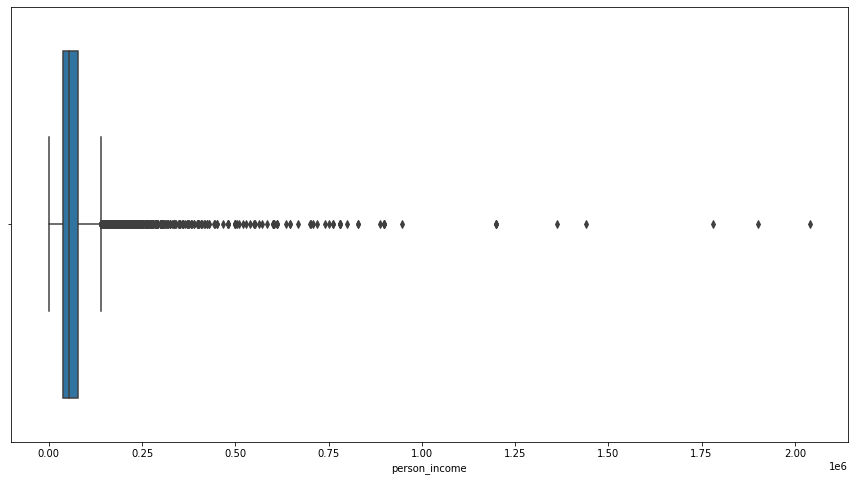

In [27]:
#Plota boxplot da variável renda

f, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='person_income', data = df)

In [28]:
#Calcula outliers da variavel renda pelo método IQR

Q1 = df.person_income.quantile(.25)
Q3 = df.person_income.quantile(.75)
IIQ = Q3 - Q1
Out_inf = Q1 - 1.5 * IIQ
Out_sup = Q3 + 1.5 * IIQ
print(Out_inf, Out_sup)

-22650.0 140150.0


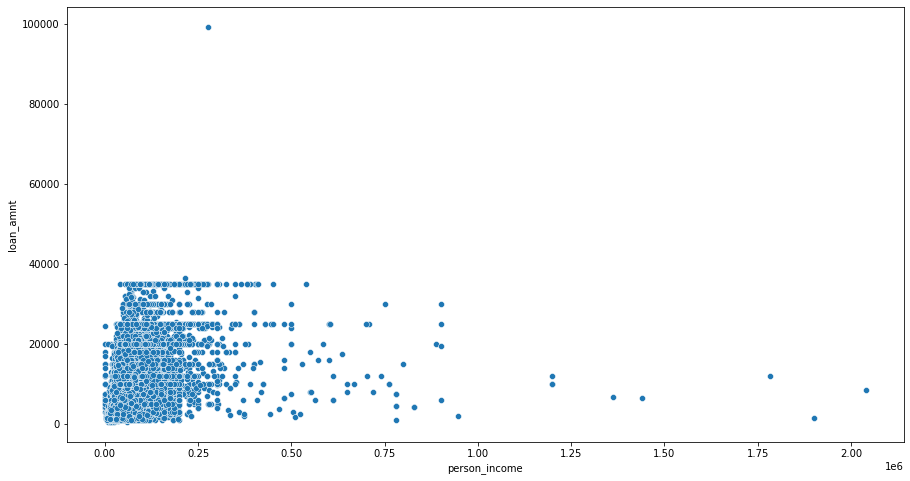

In [29]:
#Plota gráfico Renda x Valor do empréstimo solicitado

f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='person_income', y = 'loan_amnt', data = df)

In [30]:
#Exclui outliers da variável renda

df = df[df.person_income < Out_sup]
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,50000.0,Mortgage,0.0,Debtconsolidation,A,12800.0,5.79,0,0.26,N,2
1,26,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0,0.11,N,2
2,24,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0,0.30,N,2
3,23,44340.0,Own,0.0,Venture,C,3000.0,12.98,0,0.07,Y,3
4,23,48000.0,Mortgage,5.0,Education,C,5000.0,13.99,0,0.10,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...
34480,39,33996.0,Rent,6.0,Medical,D,4000.0,0.00,1,0.12,N,13
34481,24,36000.0,Mortgage,0.0,Homeimprovement,A,14775.0,6.62,0,0.41,N,4
34482,27,39600.0,Mortgage,11.0,Debtconsolidation,A,4800.0,6.76,0,0.12,N,9
34483,30,39996.0,Mortgage,8.0,Medical,C,10000.0,12.73,0,0.25,N,6


# Análise da variáveis e correlação

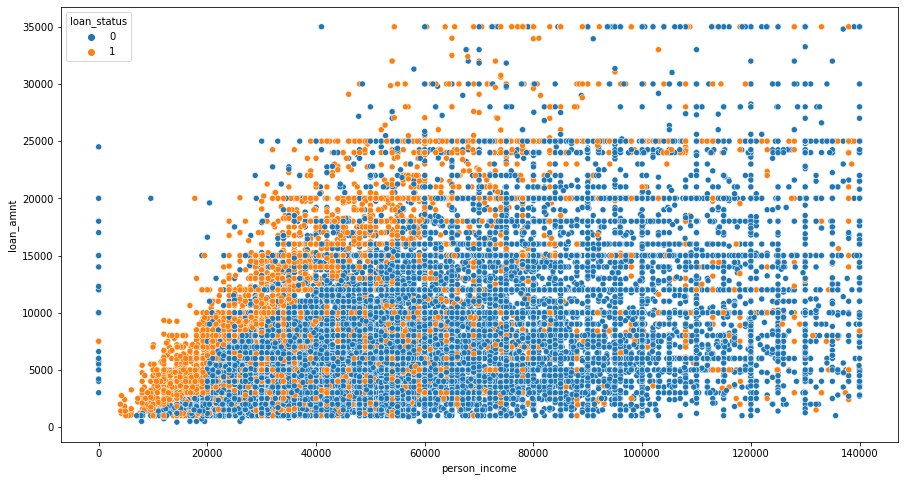

In [31]:
#Plota gráfico Renda x Valor do empréstimo diferenciando Inadiplentes e não Inadipelntes
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='person_income', y = 'loan_amnt', data = df, hue = 'loan_status')

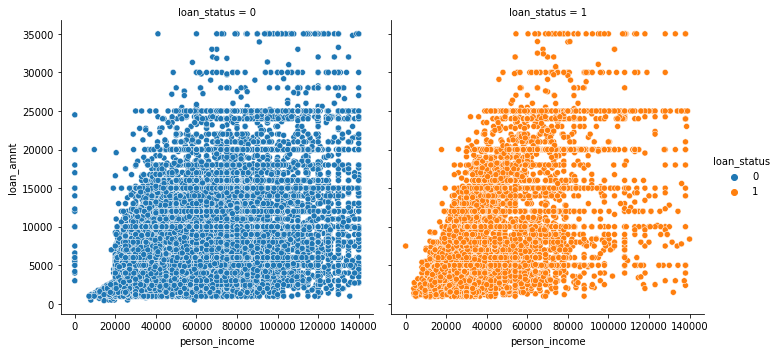

In [32]:
#Separa o gráfico anterior para facilitar observação
sns.relplot(x='person_income', y = 'loan_amnt', data = df, hue = 'loan_status', col = 'loan_status')

Percebe-se que a maior parte dos clientes inadiplentes apresentam renda anual de 80.000 ou menos. 

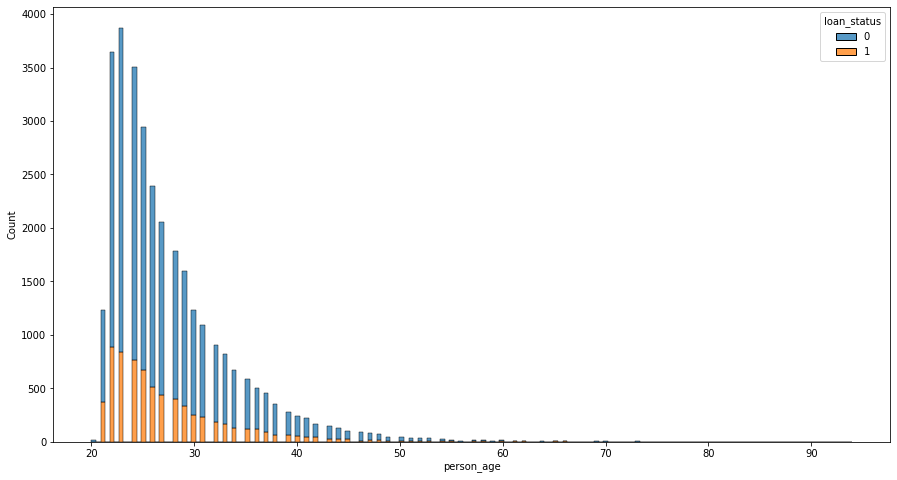

In [33]:
#Plota histograma de idade dos clientes
f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df, x='person_age', hue='loan_status', multiple="stack")

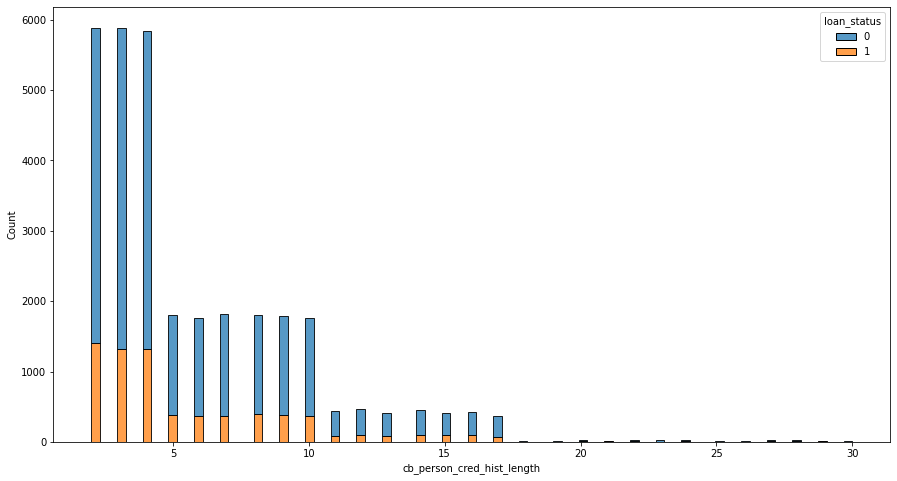

In [34]:
#Plota histograma do numero de anos do histórico de crédito dos clientes
f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df, x='cb_person_cred_hist_length', hue='loan_status', multiple="stack")

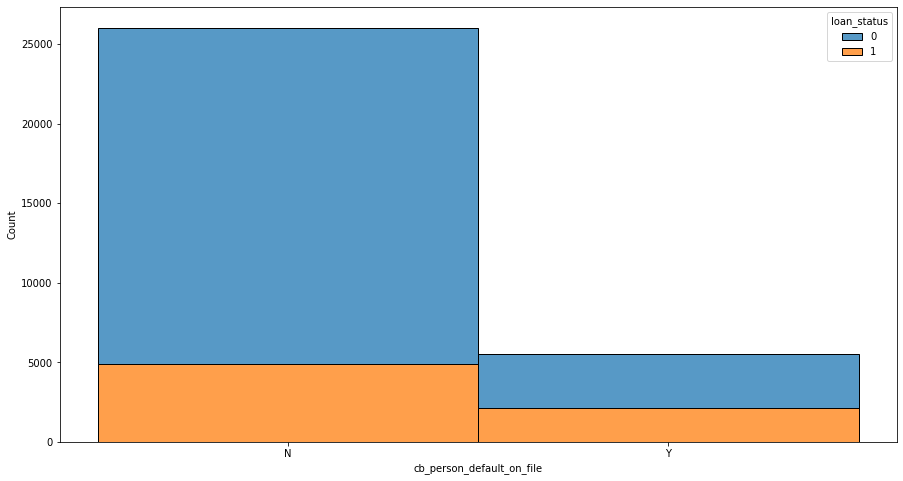

In [35]:
#Plota gráfico que ralaciona quantidade de clientes com histórico de inadiplente no passado com inadiplencia atual
f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df, x='cb_person_default_on_file', hue='loan_status', multiple="stack")

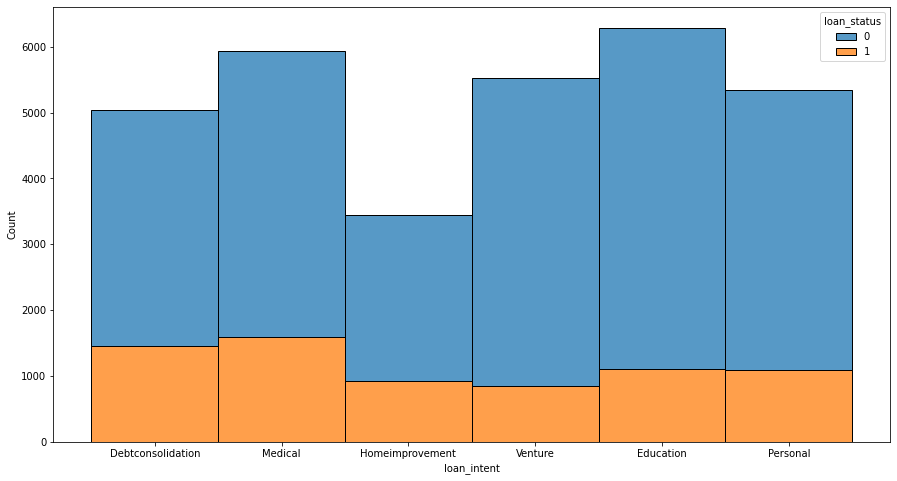

In [36]:
#Plota gráfico da quatidade de clientes por motivo do empréstimo

f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df, x='loan_intent', hue='loan_status', multiple="stack")

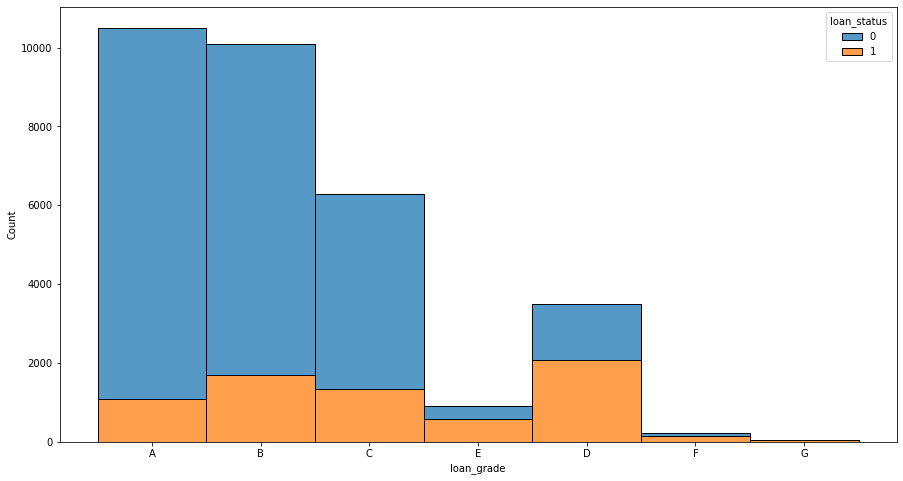

In [37]:
#Plota gráfico da quantidade de clientes pelo score de crédito em relação à inadiplencia

f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df, x='loan_grade', hue='loan_status', multiple="stack")

Percebe-se que clientes com score D, E, F e G tem maior proporção de inadiplentes.

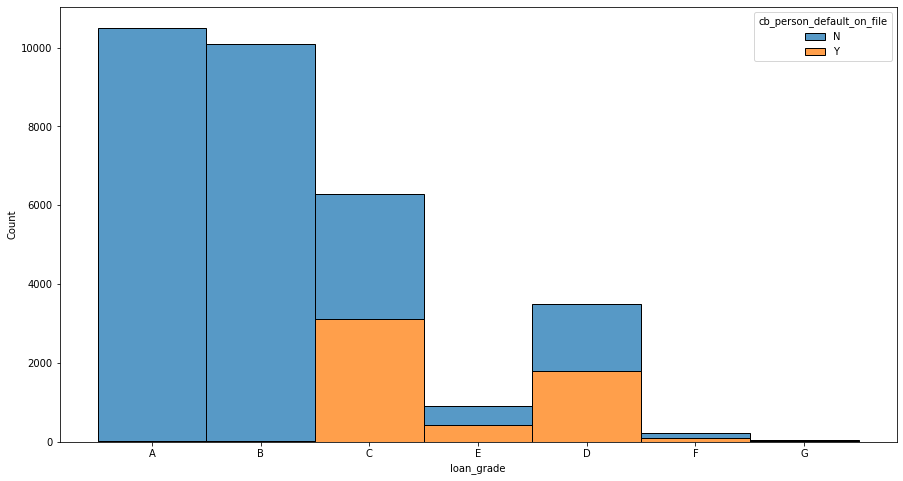

In [38]:
#Plota gráfico da quantidade de clientes pelo score de crédito em relação à inadiplencia no passado

f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df, x='loan_grade', hue='cb_person_default_on_file', multiple="stack")

O gráfico acima confirma a classificação do score adequada, visto que clientes nível A e B nunca foram inadiplentes no passado. 

# Machine Learning

## Preparação dos dados

### Encoding variáveis categóricas

In [39]:
#Identifica respostas da variável 'cb_person_default_on_file'

(df['cb_person_default_on_file'].value_counts())

N    26034
Y     5550
Name: cb_person_default_on_file, dtype: int64

In [40]:
#Transforma Y e N em 1 e 0 na variável 'cb_person_default_on_file'

df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'N' : 0, 'Y' : 1})
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,50000.0,Mortgage,0.0,Debtconsolidation,A,12800.0,5.79,0,0.26,0,2
1,26,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0,0.11,0,2
2,24,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0,0.30,0,2
3,23,44340.0,Own,0.0,Venture,C,3000.0,12.98,0,0.07,1,3
4,23,48000.0,Mortgage,5.0,Education,C,5000.0,13.99,0,0.10,1,2


In [41]:
#Identifica respostas da variável 'loan_grade' (score de crédito)

(df['loan_grade'].value_counts())

A    10503
B    10092
C     6278
D     3509
E      917
F      225
G       60
Name: loan_grade, dtype: int64

In [42]:
#Transforma a  variável 'loan_grade' em valores numéricos, sendo A a nota com valor mais alto e G o mais baixo

df['loan_grade'] = df['loan_grade'].map({'G' : 0, 'F' : 1, 'E' : 2, 'D' : 3, 'C' : 4, 'B' : 5, 'A' : 6})
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,50000.0,Mortgage,0.0,Debtconsolidation,6,12800.0,5.79,0,0.26,0,2
1,26,84996.0,Rent,0.0,Medical,5,9000.0,11.26,0,0.11,0,2
2,24,55782.0,Rent,3.0,Homeimprovement,6,17000.0,7.51,0,0.30,0,2
3,23,44340.0,Own,0.0,Venture,4,3000.0,12.98,0,0.07,1,3
4,23,48000.0,Mortgage,5.0,Education,4,5000.0,13.99,0,0.10,1,2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31584 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31584 non-null  int64  
 1   person_income               31584 non-null  float64
 2   person_home_ownership       31584 non-null  object 
 3   person_emp_length           31584 non-null  float64
 4   loan_intent                 31584 non-null  object 
 5   loan_grade                  31584 non-null  int64  
 6   loan_amnt                   31584 non-null  float64
 7   loan_int_rate               31584 non-null  float64
 8   loan_status                 31584 non-null  int64  
 9   loan_percent_income         31584 non-null  float64
 10  cb_person_default_on_file   31584 non-null  int64  
 11  cb_person_cred_hist_length  31584 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 4.1+ MB


In [44]:
df['person_home_ownership'].value_counts()

Rent        16361
Mortgage    12609
Own          2513
Other         101
Name: person_home_ownership, dtype: int64

In [45]:
df['loan_intent'].value_counts()

Education            6288
Medical              5939
Venture              5531
Personal             5336
Debtconsolidation    5042
Homeimprovement      3448
Name: loan_intent, dtype: int64

In [46]:
#Aplica Ecoding no restante das variáveis categoricas através da função get_dummies

colunas = ['person_home_ownership', 
            'loan_intent', 
            ]
for coluna in colunas:
  transforma = pd.get_dummies(df[coluna], prefix = coluna)
  df= pd.concat([df, transforma], axis=1).drop([coluna], axis=1)

In [47]:
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_Mortgage,person_home_ownership_Other,person_home_ownership_Own,person_home_ownership_Rent,loan_intent_Debtconsolidation,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture
0,22,50000.0,0.0,6,12800.0,5.79,0,0.26,0,2,1,0,0,0,1,0,0,0,0,0
1,26,84996.0,0.0,5,9000.0,11.26,0,0.11,0,2,0,0,0,1,0,0,0,1,0,0
2,24,55782.0,3.0,6,17000.0,7.51,0,0.30,0,2,0,0,0,1,0,0,1,0,0,0
3,23,44340.0,0.0,4,3000.0,12.98,0,0.07,1,3,0,0,1,0,0,0,0,0,0,1
4,23,48000.0,5.0,4,5000.0,13.99,0,0.10,1,2,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34480,39,33996.0,6.0,3,4000.0,0.00,1,0.12,0,13,0,0,0,1,0,0,0,1,0,0
34481,24,36000.0,0.0,6,14775.0,6.62,0,0.41,0,4,1,0,0,0,0,0,1,0,0,0
34482,27,39600.0,11.0,6,4800.0,6.76,0,0.12,0,9,1,0,0,0,1,0,0,0,0,0
34483,30,39996.0,8.0,4,10000.0,12.73,0,0.25,0,6,1,0,0,0,0,0,0,1,0,0


In [48]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_Mortgage', 'person_home_ownership_Other',
       'person_home_ownership_Own', 'person_home_ownership_Rent',
       'loan_intent_Debtconsolidation', 'loan_intent_Education',
       'loan_intent_Homeimprovement', 'loan_intent_Medical',
       'loan_intent_Personal', 'loan_intent_Venture'],
      dtype='object')

In [49]:
#Coloca a variável target 'loan_status' na ultima coluna do Data Frame

df = df.reindex(columns=['person_age', 'person_income', 'person_emp_length', 
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_Mortgage', 'person_home_ownership_Other',
       'person_home_ownership_Own', 'person_home_ownership_Rent', 
       'loan_grade', 'loan_amnt', 'loan_int_rate',  'loan_percent_income', 'loan_intent_Debtconsolidation',
       'loan_intent_Education', 'loan_intent_Homeimprovement',
       'loan_intent_Medical', 'loan_intent_Personal', 'loan_intent_Venture',
       'loan_status'])
df

,person_age,person_income,person_emp_length,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_Mortgage,person_home_ownership_Other,person_home_ownership_Own,person_home_ownership_Rent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_intent_Debtconsolidation,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,loan_status
0,22,50000.0,0.0,0,2,1,0,0,0,6,12800.0,5.79,0.26,1,0,0,0,0,0,0
1,26,84996.0,0.0,0,2,0,0,0,1,5,9000.0,11.26,0.11,0,0,0,1,0,0,0
2,24,55782.0,3.0,0,2,0,0,0,1,6,17000.0,7.51,0.30,0,0,1,0,0,0,0
3,23,44340.0,0.0,1,3,0,0,1,0,4,3000.0,12.98,0.07,0,0,0,0,0,1,0
4,23,48000.0,5.0,1,2,1,0,0,0,4,5000.0,13.99,0.10,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34480,39,33996.0,6.0,0,13,0,0,0,1,3,4000.0,0.00,0.12,0,0,0,1,0,0,1
34481,24,36000.0,0.0,0,4,1,0,0,0,6,14775.0,6.62,0.41,0,0,1,0,0,0,0
34482,27,39600.0,11.0,0,9,1,0,0,0,6,4800.0,6.76,0.12,1,0,0,0,0,0,0
34483,30,39996.0,8.0,0,6,1,0,0,0,4,10000.0,12.73,0.25,0,0,0,1,0,0,0


### Normalização das variáveis

In [50]:
# Aplica o método Min-Max Scaler

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['person_age', 'person_income', 'person_emp_length', 
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_Mortgage', 'person_home_ownership_Other',
       'person_home_ownership_Own', 'person_home_ownership_Rent', 
       'loan_grade', 'loan_amnt', 'loan_int_rate',  'loan_percent_income', 'loan_intent_Debtconsolidation',
       'loan_intent_Education', 'loan_intent_Homeimprovement',
       'loan_intent_Medical', 'loan_intent_Personal', 'loan_intent_Venture',
       'loan_status'])

In [51]:
df = scaled_df

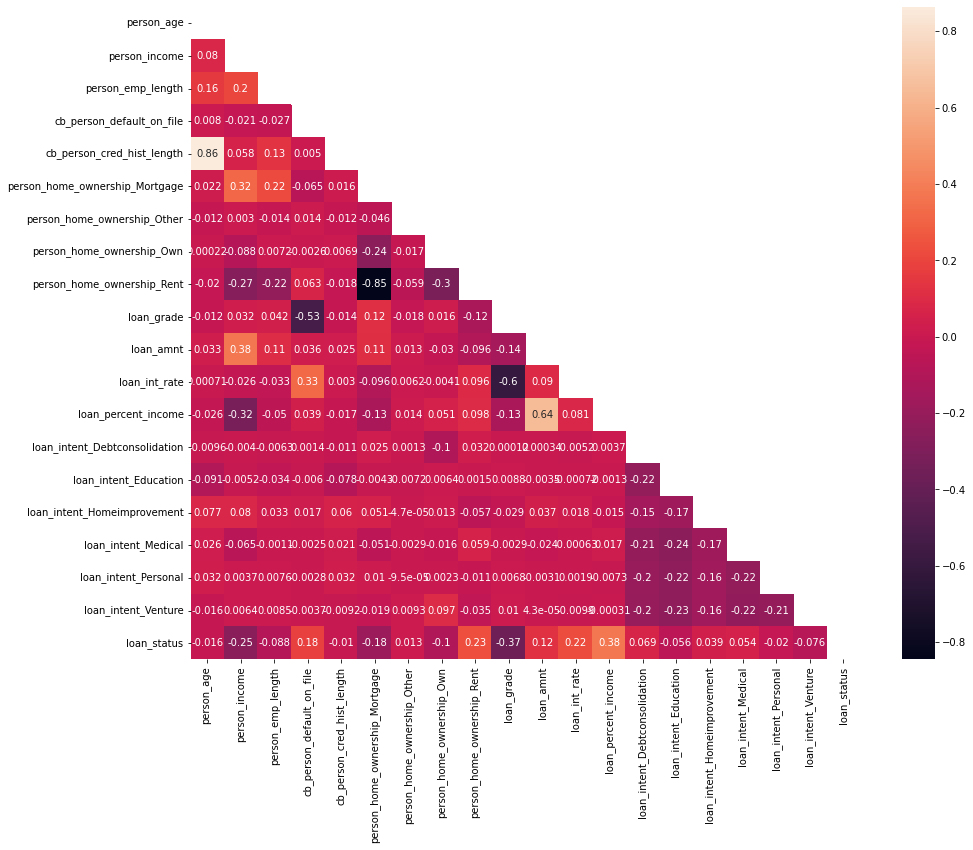

In [52]:
#Plota matriz correlação

plt.figure(figsize = ((15, 12)))
mask = np.triu(np.ones_like(df.corr())) 
dataplot = sns.heatmap(df.corr(), annot=True, mask = mask)
plt.show()

### Balanceamento na variável alvo

In [53]:
#Mostra quantas amostras temos de cada classe (0 e 1) da variável target

df.groupby('loan_status').count()

,person_age,person_income,person_emp_length,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_Mortgage,person_home_ownership_Other,person_home_ownership_Own,person_home_ownership_Rent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_intent_Debtconsolidation,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture
loan_status,,,,,,,,,,,,,,,,,,,
0.0,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564
1.0,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020


In [54]:
#Separa os dados em x e y

x = df.drop('loan_status', axis=1)
y = df['loan_status']

In [55]:
#Faz o balanceamentos através da técnica SMOTE(Synthetic Minority Oversampling Technique)

SEED=23
smote = SMOTE(random_state=SEED)
x_resampled, y_resampled = smote.fit_resample(x,y)
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

,loan_status,person_age,person_income,person_emp_length,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_Mortgage,person_home_ownership_Other,person_home_ownership_Own,person_home_ownership_Rent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_intent_Debtconsolidation,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture
0,0.0,0.027027,0.357133,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.000000,0.357788,0.249354,0.125000,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.081081,0.607097,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.833333,0.247859,0.484927,0.052885,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.054054,0.398431,0.073171,0.0,0.000000,0.0,0.0,0.0,1.0,1.000000,0.479287,0.323428,0.144231,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.040541,0.316705,0.000000,1.0,0.035714,0.0,0.0,1.0,0.0,0.666667,0.074288,0.559001,0.033654,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.040541,0.342847,0.121951,1.0,0.000000,1.0,0.0,0.0,0.0,0.666667,0.132145,0.602498,0.048077,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49123,1.0,0.275568,0.509644,0.435699,1.0,0.442573,1.0,0.0,0.0,0.0,0.500000,0.274092,0.609706,0.066843,1.0,0.0,0.0,0.0,0.0,0.0
49124,1.0,0.037924,0.180787,0.097561,0.0,0.071429,0.0,0.0,0.0,1.0,0.833333,0.053136,0.515763,0.041046,0.0,0.0,1.0,0.0,0.0,0.0
49125,1.0,0.055500,0.233913,0.043563,0.0,0.031894,0.0,0.0,0.0,1.0,0.333333,0.103217,0.771304,0.056664,0.0,0.0,1.0,0.0,0.0,0.0
49126,1.0,0.075731,0.253865,0.087904,1.0,0.000000,0.0,0.0,0.0,1.0,0.666667,0.371209,0.575714,0.178885,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
#Apresenta os novos dados, agora balanceados

df = df_balanced
df.groupby('loan_status').count()

,person_age,person_income,person_emp_length,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_Mortgage,person_home_ownership_Other,person_home_ownership_Own,person_home_ownership_Rent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,loan_intent_Debtconsolidation,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture
loan_status,,,,,,,,,,,,,,,,,,,
0.0,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564
1.0,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564,24564


In [57]:
#Define novo x e y balanceados

x = df.drop('loan_status', axis=1)
y = df['loan_status']

## Treino e Teste Modelos de Machine Learning

### Linear SVC

In [58]:
#Separa x e y para treino e para teste, sendo 25% da amostra para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

#Treina o modelo LinearSVC
lsvc = LinearSVC(max_iter=1000, random_state=SEED)
lsvc.fit(x_train, y_train)
y_pred1 = lsvc.predict(x_test)

#Imprime as métricas encontradas para Linear SVC
print("Acurácia:",metrics.accuracy_score(y_test, y_pred1))
print("Precisão:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1)) 
print("F1:",metrics.f1_score(y_test, y_pred1))

Acurácia: 0.7860283341475329
Precisão: 0.7799805004874878
Recall: 0.7902535396773132
F1: 0.7850834151128557


### K-Neighbors Classifier

In [59]:
#Treina o modelo KNeighbors Classifier
knc = KNeighborsClassifier(n_neighbors = 10)
knc.fit(x_train, y_train)
y_pred2 = knc.predict(x_test)

#Imprime as métricas encontradas para KNeighbors Classifier
print("Acurácia:",metrics.accuracy_score(y_test, y_pred2))
print("Precisão:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2)) 
print("F1:",metrics.f1_score(y_test, y_pred2))

Acurácia: 0.8643543396840906
Precisão: 0.8553692357304096
Recall: 0.8733947974975305
F1: 0.8642880417073967


### Decision Tree

In [60]:
#Treina o modelo Decision Tree
dt =  DecisionTreeClassifier(max_depth= 10, random_state=SEED)
dt.fit(x_train, y_train)
y_pred3 = dt.predict(x_test)

#Imprime as métricas encontradas para Decision Tree
print("Acurácia:",metrics.accuracy_score(y_test, y_pred3))
print("Precisão:",metrics.precision_score(y_test, y_pred3))
print("Recall:",metrics.recall_score(y_test, y_pred3)) 
print("F1:",metrics.f1_score(y_test, y_pred3))

Acurácia: 0.8726591760299626
Precisão: 0.9557396928051738
Recall: 0.7785643727362529
F1: 0.8581019778624569


### Random Forest

In [61]:
rf =  RandomForestClassifier(max_depth= 10, random_state=SEED)
rf.fit(x_train, y_train)
y_pred4 = rf.predict(x_test)

#Imprime as métricas encontradas para Random Forest
print("Acurácia:",metrics.accuracy_score(y_test, y_pred4))
print("Precisão:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4)) 
print("F1:",metrics.f1_score(y_test, y_pred4))

Acurácia: 0.8777886337730011
Precisão: 0.9544822102961638
Recall: 0.7905828119855121
F1: 0.864835659612787


### Comparação dos Resultados

In [62]:
#Plota tabela com as métricas dos 4 modelos

metricas = ['modelo', 'acuracia', 'precisao', 'recall', 'F1']

resultados = [
    ['LinearSVC', metrics.accuracy_score(y_test,y_pred1 ),metrics.precision_score(y_test,y_pred1),metrics.recall_score(y_test,y_pred1),metrics.f1_score(y_test,y_pred1)],
    ['KNeighbors Classifier', metrics.accuracy_score(y_test,y_pred2 ),metrics.precision_score(y_test,y_pred2),metrics.recall_score(y_test,y_pred2),metrics.f1_score(y_test,y_pred2)],
    ['Decision Tree' ,metrics.accuracy_score(y_test,y_pred3 ),metrics.precision_score(y_test,y_pred3),metrics.recall_score(y_test,y_pred3),metrics.f1_score(y_test,y_pred3)],
    ['Random Forest', metrics.accuracy_score(y_test,y_pred4 ),metrics.precision_score(y_test,y_pred4),metrics.recall_score(y_test,y_pred4),metrics.f1_score(y_test,y_pred4)]]

tabela = pd.DataFrame(data = resultados, columns = metricas)
tabela

,modelo,acuracia,precisao,recall,F1
0,LinearSVC,0.786028,0.779981,0.790254,0.785083
1,KNeighbors Classifier,0.864354,0.855369,0.873395,0.864288
2,Decision Tree,0.872659,0.955740,0.778564,0.858102
3,Random Forest,0.877789,0.954482,0.790583,0.864836


In [63]:
#Cria as matrizes Consusão dos modelos

cm_lsvc = confusion_matrix(y_test, y_pred1)
cm_knc = confusion_matrix(y_test, y_pred2)
cm_dt = confusion_matrix(y_test, y_pred3)
cm_rf = confusion_matrix(y_test, y_pred4)

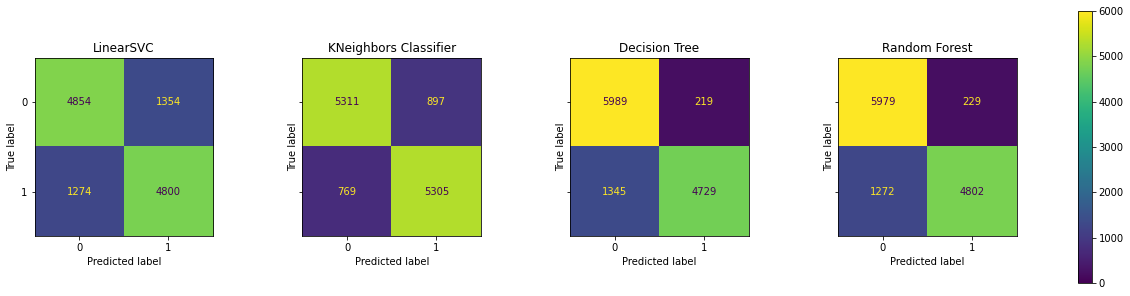

In [64]:
#Plota as Matrizes Confusão dos 4 modelos

f, axes = plt.subplots(1, 4, figsize=(23, 5), sharey='row')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lsvc)
disp.plot(ax= axes[0])
disp.ax_.set_title('LinearSVC')
disp.im_.set_clim(vmin=0 , vmax= 6000)
disp.im_.colorbar.remove()


disp = ConfusionMatrixDisplay(confusion_matrix=cm_knc)
disp.plot(ax= axes[1])
disp.ax_.set_title('KNeighbors Classifier')
disp.im_.set_clim(vmin=0 , vmax= 6000)
disp.im_.colorbar.remove()


disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot(ax= axes[2])
disp.ax_.set_title('Decision Tree')
disp.im_.set_clim(vmin=0 , vmax= 6000)
disp.im_.colorbar.remove()


disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(ax= axes[3])
disp.ax_.set_title('Random Forest')
disp.im_.set_clim(vmin=0 , vmax= 6000)
disp.im_.colorbar.remove()

f.colorbar(disp.im_, ax=axes)
plt.show()

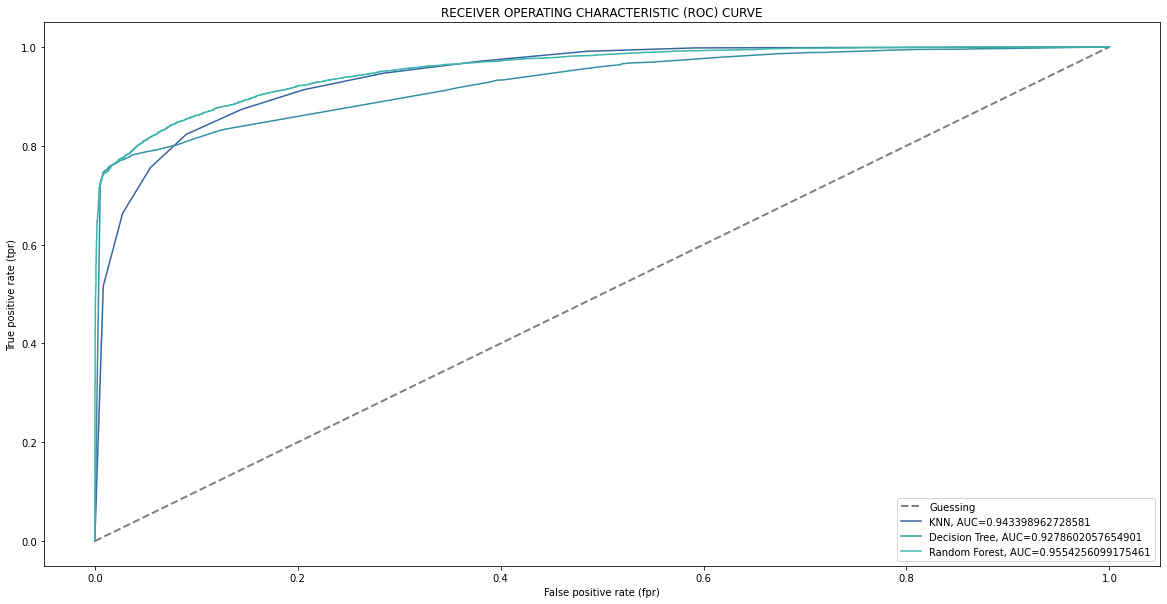

<Figure size 1440x720 with 0 Axes>

In [65]:
#Cria as Curvas ROC dos modlos
knn_pproba= knc.predict_proba(x_test)[::, 1]
fpr1, tpr1, _= metrics.roc_curve(y_test, knn_pproba)
auc1 = metrics.roc_auc_score(y_test, knn_pproba)

dt_pproba= dt.predict_proba(x_test)[::, 1]
fpr2, tpr2, _= metrics.roc_curve(y_test, dt_pproba)
auc2 = metrics.roc_auc_score(y_test, dt_pproba)

rf_pproba= rf.predict_proba(x_test)[::, 1]
fpr3, tpr3, _= metrics.roc_curve(y_test, rf_pproba)
auc3 = metrics.roc_auc_score(y_test, rf_pproba)

plt.rcParams['figure.figsize'] = (20, 10.)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label ='Guessing')
plt.plot(fpr1,tpr1,color = '#37659e', label='KNN, AUC='+str(auc1))
plt.plot(fpr2,tpr2,color = '#348fa7', label='Decision Tree, AUC='+str(auc2))
plt.plot(fpr3,tpr3,color = '#40b7ad', label='Random Forest, AUC='+str(auc3))

plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('RECEIVER OPERATING CHARACTERISTIC (ROC) CURVE')
plt.legend(loc=4)
plt.show()

plt.figure(0).clf()

Entende-se que fornecer crédito a pessoas potencialmente inadiplentes trará maior prejuízo à empresa, é interessante que o número de falsos negativos seja o menor possível. 
Ou seja, é altamente desejável que o modelo consiga identificar aqueles clientes que serão inadiplentes com maior exatatidão, mesmo que para isso, o modelo classifique erroneamente alguns clientes que não seriam inadiplentes (falsos positivos).

Portanto, o modelo que apresentou menor número de falsos negativos foi o K-Neighbors Classifier, tento apresentado também todas as quatro métricas (acurácia, precisão, recall e f1) mais equeilibradas entre si, e acima de 0,8.  Desta forma, este será o modelo escolhido para ser otimizado, com foco princiaplemente em melhorar principalmente a sua acurácia e sensibilidade.

## Otimização do Modelo

... em desenvolvimento
